In [1]:
# Link to resources
import os, sys
sys.path.insert(0, '/home/jovyan/work/')

In [ ]:
import datetime

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
try:
    import ta
    
except ImportError:
    !pip install ta
    import ta

In [2]:
from utils import (
    get_data_between_dates,
)

# Kolumny
| Nazwa zmiennej | Opis |
| --- | --- |
| timestamp | 1 |
| close_time | 1 |
| open | cena na starcie |
| high | najwyższa wartość |
| low | najniższa wartość |
| close | cena na zakmnięciu|
| volume | wielkość transakcji |
| quote_av | 1 |
| trades | Liczba transakcji |
| tb_base_av | 1 |
| tb_quote_av | 1 |
| ignore | 1 |


In [28]:
BTC_PATH = "/home/jovyan/work/data/BTCUSDT-1m-data.csv"

In [29]:
df = pd.read_csv(BTC_PATH)

In [30]:
columns_to_drop = ['ignore', 'tb_base_av', 'tb_quote_av', 'close_time']

In [31]:
df.drop(columns_to_drop, inplace=True, axis=1)

In [32]:
df_timestamp = get_data_between_dates(df)
df_10_minutes = df_timestamp[::10]

<AxesSubplot:xlabel='timestamp'>

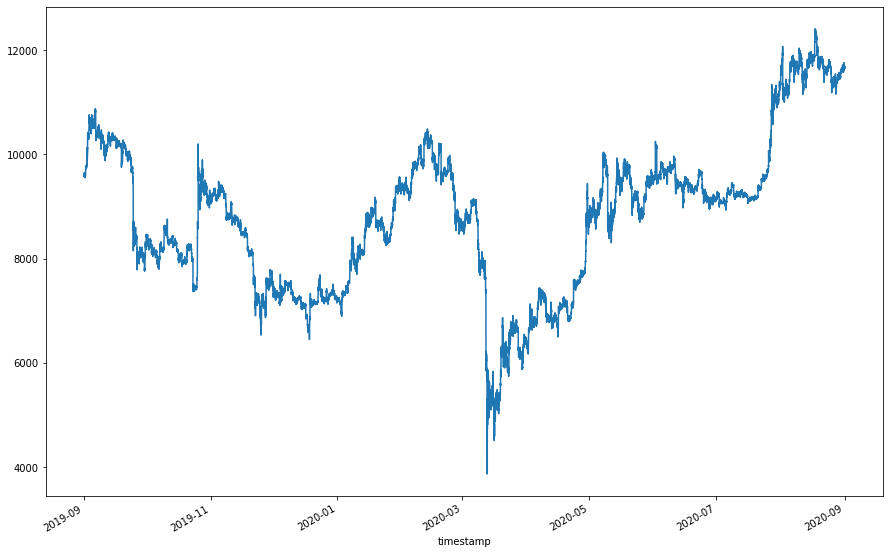

In [35]:
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
df_10_minutes.plot(x='timestamp',y='close', legend=None, ax=ax1)

In [39]:
df_10_minutes.isna().any()

timestamp    False
open         False
high         False
low          False
close        False
volume       False
quote_av     False
trades       False
dtype: bool

In [52]:
df_ta = df_10_minutes.copy(deep=True)

In [53]:
df_ta.shape

(52588, 8)

In [54]:
# Add all ta features
df_ta = ta.add_all_ta_features(
    df_ta, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

/opt/conda/lib/python3.8/site-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/opt/conda/lib/python3.8/site-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [55]:
df_ta.dropna(axis=1, inplace=True)

In [56]:
df_ta.shape

(52588, 91)

In [60]:
df_ta.isna().any().any()

False

In [63]:
df_work = df_ta.copy(deep=True)

In [65]:
df_work['timestamp'] = pd.to_datetime(df_work['timestamp'])
df_work['Year'] = df_work['timestamp'].dt.year
df_work['Month'] = df_work['timestamp'].dt.month
df_work['Week'] = df_work['timestamp'].dt.weekofyear
df_work['Weekday'] = df_work['timestamp'].dt.weekday
df_work['Day'] = df_work['timestamp'].dt.day
df_work['Hour'] = df_work['timestamp'].dt.hour
df_work['Minute'] = df_work['timestamp'].dt.minute

<ipython-input-65-accf5a726a8c>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_work['Week'] = df_work['timestamp'].dt.weekofyear


In [71]:
df_work.drop('timestamp', inplace=True, axis=1)

In [72]:
df_work

open      high       low     close     volume       quote_av  \
0        9583.20   9592.95   9579.61   9587.72  10.951961  105013.358777   
10       9602.27   9611.19   9602.18   9605.79   7.604521   73071.552408   
20       9615.98   9619.97   9615.98   9617.96   3.030438   29149.140125   
30       9620.02   9623.55   9620.00   9620.18  13.993383  134657.836313   
40       9614.21   9614.21   9601.26   9609.01  13.895473  133499.947794   
...          ...       ...       ...       ...        ...            ...   
525830  11674.64  11678.08  11671.75  11676.66  37.829750  441705.991724   
525840  11681.61  11682.68  11680.57  11681.37  10.072148  117658.979917   
525850  11675.44  11682.77  11675.43  11682.16  32.013258  373878.977660   
525860  11689.47  11689.48  11686.31  11688.41  26.032625  304284.552542   
525870  11659.59  11659.60  11650.98  11653.91  20.695508  241211.122636   

        trades    volume_adi    volume_obv  volume_cmf  ...  others_dr  \
0          234      2.364441     10.951961    0.215892  ...   8.931804   
10         147      0.853665     18.556482    0.046004  ...   0.188470   
20          57      0.830880     21.586920    0.038490  ...   0.126694   
30         105    -11.743456     35.580303   -0.330055  ...   0.023082   
40         249     -9.007281     21.684830   -0.182054  ...  -0.116110   
...        ...           ...           ...         ...  ...        ...   
525830     508  29840.290560 -23747.996092   -0.162284  ...   0.091377   
525840     206  29837.856059 -23737.923944   -0.109244  ...   0.040337   
525850     539  29864.548313 -23705.910686   -0.068034  ...   0.006763   
525860     314  29873.006863 -23679.878061   -0.027547  ...   0.053500   
525870     563  29866.380459 -23700.573569    0.040315  ...  -0.295164   

        others_dlr  others_cr  Year  Month  Week  Weekday  Day  Hour  Minute  
0         0.000000   0.000000  2019      9    35        6    1     0       1  
10        0.188293   0.188470  2019      9    35        6    1     0      11  
20        0.126614   0.315403  2019      9    35        6    1     0      21  
30        0.023079   0.338558  2019      9    35        6    1     0      31  
40       -0.116178   0.222055  2019      9    35        6    1     0      41  
...            ...        ...   ...    ...   ...      ...  ...   ...     ...  
525830    0.091335  21.787662  2020      8    36        0   31    23      16  
525840    0.040329  21.836787  2020      8    36        0   31    23      26  
525850    0.006763  21.845027  2020      8    36        0   31    23      36  
525860    0.053486  21.910214  2020      8    36        0   31    23      46  
525870   -0.295601  21.550379  2020      8    36        0   31    23      56  

[52588 rows x 97 columns]

AttributeError: module 'ta.utils' has no attribute 'split_df2'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)